# Проект: EDA платформы TeddyFood

##### Teddy Food — это сервис, где пользователи помогаютбездомным собакам и кошкам из приютов по всей стране.Кормите, ухаживайте, дарите приятности и наблюдайте за питомцамив режиме реального времени. Получайте звания за действия на сайте,и TF баллы, которые можно потратить в сервисе и уже скоро в магазинахнаших партнёров

**Содержание отчета:**  
1.[Предобработка данных](#1)   
2.**Основаня часть.**  
[2.1  Обзор питомцев на платформе](#2)  
[2.2 Обзор информции по приютам](#3)  
[2.3 Проверка гипотез](#4)   
[2.4 Обзор информации по транзакциям](#5)  
[3. Выводы и рекомендации](#6)  
[4. Презентация](https://yadi.sk/i/GzTZUeMi4tWT3A)


In [1]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import timedelta
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#создадим пусть
path = 'C:/Users/rochev/Desktop/Яндекс/TeddyFood/'

In [3]:
#загрузим данные
transaction = pd.read_csv(path + 'Teddy_Food_Transactions.csv')
description = pd.read_csv(path + 'Teddy_Food_Descriptions.csv')

<a id="1"></a>
# 1.Предобработка данных

In [4]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81527 entries, 0 to 81526
Data columns (total 7 columns):
Кличка питомца       81527 non-null object
ИД питомца           81527 non-null int64
Название приюта      81527 non-null object
Название операции    81527 non-null object
Сумма операции       81527 non-null float64
Дата                 81527 non-null object
Номер заказа         81527 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 4.4+ MB


In [5]:
transaction.columns = ['pet_name','id_pet','shelter','order_type','amount','datetime','transaction_id']
transaction.sample()

pet_name  id_pet    shelter order_type  amount             datetime  \
46931    Альфа     556  Кот и Пёс   ПёсоДень   155.0  2019-04-04 14:57:17   

       transaction_id  
46931           39608

In [6]:
#изменим тип данных для datetime
transaction['datetime'] = pd.to_datetime(transaction['datetime'],format = '%Y-%m-%d')
#сделаем отдельны столбец с датой
transaction['date']= transaction['datetime'].dt.date

In [7]:
transaction.sample(5)

pet_name  id_pet                                 shelter  \
38668     Кроша     693                             Люськин дом   
52950      Марк     652                             Люськин дом   
29792  Изюминка     208  Самарский приют для животных "НадеждА"   
53469      Шура     933                              Мокрый нос   
54654     Дикки    1115                           Добрые сердца   

                               order_type  amount            datetime  \
38668                          1 КотоДень    72.0 2018-12-11 21:27:08   
52950  Наполнитель для туалета Fresh Step    36.0 2019-06-26 16:35:00   
29792               Вылечите питомцу ушки   115.0 2018-07-16 13:40:55   
53469                          1 ПёсоДень   145.0 2019-06-28 17:44:05   
54654                      Корм для котят   100.0 2019-07-10 20:51:19   

       transaction_id        date  
38668           34973  2018-12-11  
52950           43286  2019-06-26  
29792           29083  2018-07-16  
53469           43579  2019-06-28  
54654           44309  2019-07-10

In [8]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81527 entries, 0 to 81526
Data columns (total 8 columns):
pet_name          81527 non-null object
id_pet            81527 non-null int64
shelter           81527 non-null object
order_type        81527 non-null object
amount            81527 non-null float64
datetime          81527 non-null datetime64[ns]
transaction_id    81527 non-null int64
date              81527 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 5.0+ MB


In [9]:
transaction.duplicated().sum()

0

##### В таблице нет пропусков, типы данных соотв значению

In [10]:
description.head(1)

id  Кличка                            Ссылка на профиль  \
0   1  Мадлен  https://teddyfood.com/ru/animals/madeleine/   

                                    Приют   Город      Порода    Вид  \
0  Самарский приют для животных "НадеждА"  Самара  Без породы  Кошки   

  Дата рождения      Пол  В избранном  Уже дома  Забрать домой  Погулять  
0    2015-09-23  девочка            0         1              0         0

In [11]:
description.columns = ['id_pet','pet_name','profile_link','shelter','city','bride','species','date_of_birth','sex','liked','adopted','take_home','give_a_walk']
description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 13 columns):
id_pet           1554 non-null int64
pet_name         1554 non-null object
profile_link     1554 non-null object
shelter          1554 non-null object
city             1554 non-null object
bride            1554 non-null object
species          1554 non-null object
date_of_birth    1554 non-null object
sex              1554 non-null object
liked            1554 non-null int64
adopted          1554 non-null int64
take_home        1554 non-null int64
give_a_walk      1554 non-null int64
dtypes: int64(5), object(8)
memory usage: 158.0+ KB


In [12]:
#переведем дату рождения в соотв тип
description['date_of_birth'] = pd.to_datetime(description['date_of_birth'], format = '%Y-%m-%d')

In [13]:
description.duplicated().sum()

0

##### В таблице нет пропусков, типы данных соотв значению


<a id="2"></a>
### 2. Основная часть
# 2.1 Питомцы

In [14]:
#посмтрим период за котрый предоставлена инфа
print('Первая транзакция :', min(transaction['date']),'Последняя:', max(transaction['date']))

Первая транзакция : 2016-11-08 Последняя: 2020-04-13


In [15]:
#посмотрим сколько за все годы было питомцев и сравним их количество в вдух таблицах
print('Питомцев в таблице Description:',description.id_pet.nunique(),', Питомцев в таблице Transaction:',transaction.id_pet.nunique())

Питомцев в таблице Description: 1554 , Питомцев в таблице Transaction: 1538


##### В описании больше питомцев чем в транзакциях, т.е.  для  каких-то животных не поступало платежей

In [16]:
#взглянем на тех, кто не был в  транзакции ни разу
pet_tr_out = description[~description['id_pet'].isin(transaction['id_pet'])]

In [17]:
#этих ребят забрали без единой транзакции - посмотрим на них
pet_tr_out.query('adopted == "1"').head()

id_pet pet_name                                   profile_link  \
110     112   Забава       https://teddyfood.com/ru/animals/zabava/   
314     317   Канзас       https://teddyfood.com/ru/animals/Kansas/   
474     478  Булочка          https://teddyfood.com/ru/animals/Bun/   
744     749   Кармен  https://teddyfood.com/ru/animals/Karmen_perm/   
755     760  Сахарок      https://teddyfood.com/ru/animals/Saharok/   

                                shelter    city       bride species  \
110  Частный Московский приют "МУРКОША"  Москва  Без породы   Кошки   
314  Частный Московский приют "МУРКОША"  Москва  Без породы   Кошки   
474                           Матроскин   Пермь  Без породы   Кошки   
744                           Матроскин   Пермь  Без породы   Кошки   
755                           Матроскин   Пермь  Без породы   Кошки   

    date_of_birth      sex  liked  adopted  take_home  give_a_walk  
110    2014-12-10  девочка      0        1          0            0  
314    2017-03-20  мальчик      0        1          0            0  
474    2016-01-20  девочка      1        1          0            0  
744    2015-05-20  девочка      0        1          0            0  
755    2016-07-20  мальчик      0        1          0            0

In [18]:
#список приютов в городах, где животных сразу забрали
pet_tr_out[['shelter','city']].groupby(['shelter', 'city']).size().sort_values(ascending = False)


shelter                                 city           
Матроскин                               Пермь              6
Лёхин дом                               Екатеринбург       3
Частный Московский приют "МУРКОША"      Москва             2
Самарский приют для животных "НадеждА"  Самара             2
Приют для кошек "ЯрКот"                 Ярославль          2
Приют для кошек "Потеряшка"             Санкт-Петербург    2
Мокрый нос                              Киров              1
Люськин дом                             Казань             1
Кошачий приют "ДОМИК"                   Волгоград          1
Котофей                                 Сочи               1
dtype: int64


Питомцы без внимания

In [19]:
pet_tr_out.query('adopted == "0"')

id_pet pet_name                                   profile_link  \
1475    1482     Гуся        https://teddyfood.com/ru/animals/Gusia/   
1483    1490     Лиса  https://teddyfood.com/ru/animals/Lisa_samara/   

                                     shelter    city       bride species  \
1475  Самарский приют для животных "НадеждА"  Самара  Без породы   Кошки   
1483  Самарский приют для животных "НадеждА"  Самара  Без породы   Кошки   

     date_of_birth      sex  liked  adopted  take_home  give_a_walk  
1475    2017-10-15  мальчик      0        0          0            0  
1483    2017-05-20  девочка      0        0          0            0

##### <p><font size="5" color="blue" face="Arial">Этих кошек надо поставить на видное место, их не разу не кормили, и не забрали</font>

In [20]:
print('Питомцев в description:', description.id_pet.count())

Питомцев в description: 1554


In [21]:
print('Питомцев в transaction:', transaction.id_pet.nunique())

Питомцев в transaction: 1538


В транзакциях есть питомцы, котрых нет в описании

In [22]:
# Выведем транзакции, питомцев в котрых нет в описании
pet_des_out =transaction[~transaction['id_pet'].isin(description['id_pet'])]
pet_des_out

pet_name  id_pet                shelter  \
81443     Чаплин    1562  Кошачий приют "ДОМИК"   
81450  Одуванчик    1561  Кошачий приют "ДОМИК"   
81451     Чаплин    1562  Кошачий приют "ДОМИК"   
81452   Мурлышка    1563  Кошачий приют "ДОМИК"   
81458     Чаплин    1562  Кошачий приют "ДОМИК"   
81471   Мурлышка    1563  Кошачий приют "ДОМИК"   
81477  Одуванчик    1561  Кошачий приют "ДОМИК"   
81478   Мурлышка    1563  Кошачий приют "ДОМИК"   
81505       Шайн    1565              Лёхин дом   
81507       Шайн    1565              Лёхин дом   
81509  Одуванчик    1561  Кошачий приют "ДОМИК"   
81510   Мурлышка    1563  Кошачий приют "ДОМИК"   
81512     Эрмоса    1564              Лёхин дом   
81513       Шайн    1565              Лёхин дом   
81516  Одуванчик    1561  Кошачий приют "ДОМИК"   
81517   Мурлышка    1563  Кошачий приют "ДОМИК"   
81519     Эрмоса    1564              Лёхин дом   
81520       Шайн    1565              Лёхин дом   
81523     Эрмоса    1564              Лёхин дом   

                              order_type  amount            datetime  \
81443        Избавить питомца от глистов   185.0 2020-04-12 10:34:00   
81450           Избавить питомца от блох   100.0 2020-04-12 12:38:58   
81451                           Витамины   100.0 2020-04-12 12:38:58   
81452                           Витамины   100.0 2020-04-12 12:38:58   
81458                           Витамины   447.0 2020-04-12 13:56:44   
81471        Избавить питомца от глистов   185.0 2020-04-12 16:58:37   
81477           Избавить питомца от блох   200.0 2020-04-12 18:30:51   
81478                           Витамины   100.0 2020-04-12 18:30:51   
81505  Влажный корм Royal Canin Recovery   500.0 2020-04-12 22:50:59   
81507  Влажный корм Royal Canin Recovery  2034.0 2020-04-12 23:00:41   
81509           Избавить питомца от блох   300.0 2020-04-13 00:25:40   
81510                           Витамины   200.0 2020-04-13 00:25:40   
81512         Биохимический анализ крови   300.0 2020-04-13 00:25:40   
81513                        УЗИ питомца   200.0 2020-04-13 00:25:40   
81516           Избавить питомца от блох   100.0 2020-04-13 10:18:23   
81517                           Витамины   147.0 2020-04-13 10:18:23   
81519         Биохимический анализ крови   100.0 2020-04-13 10:18:23   
81520                        УЗИ питомца   100.0 2020-04-13 10:18:23   
81523         Биохимический анализ крови   100.0 2020-04-13 10:46:21   

       transaction_id        date  
81443           66781  2020-04-12  
81450           66790  2020-04-12  
81451           66790  2020-04-12  
81452           66790  2020-04-12  
81458           66798  2020-04-12  
81471           66809  2020-04-12  
81477           66815  2020-04-12  
81478           66815  2020-04-12  
81505           66862  2020-04-12  
81507           66865  2020-04-12  
81509           66873  2020-04-13  
81510           66873  2020-04-13  
81512           66873  2020-04-13  
81513           66873  2020-04-13  
81516           66889  2020-04-13  
81517           66889  2020-04-13  
81519           66889  2020-04-13  
81520           66889  2020-04-13  
81523           66892  2020-04-13

##### Вот этих ребят нет в таблице описание

In [23]:
#посмотрим процент питомцев, нашедших дом ()
adopted = description[description['adopted']==1]['id_pet'].count()
print('Питомцев, нашедших дом:',adopted)

Питомцев, нашедших дом: 1148


In [24]:
#процент усыновленных
part_adopted = adopted/description['id_pet'].count()
print('процент усыновленных: {:.2%}'.format(part_adopted))

процент усыновленных: 73.87%


74% всех питомцев нашли дом сейчас. но нужно понимть, что цифра усоовная, и многие только появились на сайте. Время пребывания на сайте до усыновления мы еще посмотрим


# Посмотрим топ питомцев на котрых больше всего потратили средств

In [25]:
#выберем 20 питомцев, на кого потратили больще всего
top_pets = (transaction.groupby(['id_pet','pet_name'])
            .agg({'amount':'sum'})
            .sort_values(by = 'amount', ascending = False)
            .head(20)
            .reset_index())
top_pets

id_pet  pet_name     amount
0      431      Зося  156809.70
1      557     Рыжий  111488.00
2       93     Жорик  103916.28
3     1034    Рыська   84483.00
4       94       Рон   83126.36
5      680      Ашан   82629.50
6      512     Конор   81824.50
7      573     Рыжий   81088.71
8      385      Джек   80305.43
9      188     Бэлла   79808.43
10     251      Нора   78428.00
11     464      Зина   76306.00
12     428  Матрешка   76285.00
13     694      Олли   75567.00
14    1083    Персик   72287.00
15      95      Няша   71831.00
16      90      Стиф   69022.73
17     500     Гриша   68062.47
18     311      Бася   64628.27
19     377      Боня   63966.58

In [26]:
# посмотрим на них в описании
description[description['id_pet'].isin(top_pets['id_pet'])].sort_values(by = 'adopted')

id_pet  pet_name                                       profile_link  \
88        90      Стиф             https://teddyfood.com/ru/animals/stif/   
689      694      Олли             https://teddyfood.com/ru/animals/Olli/   
675      680      Ашан            https://teddyfood.com/ru/animals/Ashan/   
569      573     Рыжий            https://teddyfood.com/ru/animals/Red_v/   
553      557     Рыжий         https://teddyfood.com/ru/animals/Ryzhiy_k/   
508      512     Конор            https://teddyfood.com/ru/animals/Conor/   
496      500     Гриша           https://teddyfood.com/ru/animals/Grisha/   
460      464      Зина             https://teddyfood.com/ru/animals/Zina/   
427      431      Зося            https://teddyfood.com/ru/animals/Zosia/   
424      428  Матрешка       https://teddyfood.com/ru/animals/Matryoshka/   
381      385      Джек             https://teddyfood.com/ru/animals/Jack/   
373      377      Боня          https://teddyfood.com/ru/animals/Bonya_s/   
308      311      Бася            https://teddyfood.com/ru/animals/Basia/   
248      251      Нора             https://teddyfood.com/ru/animals/Nora/   
93        95      Няша           https://teddyfood.com/ru/animals/nyasha/   
92        94       Рон              https://teddyfood.com/ru/animals/ron/   
1077    1083    Персик  https://teddyfood.com/ru/animals/Persik_centra...   
186      188     Бэлла             https://teddyfood.com/ru/animals/bela/   
91        93     Жорик            https://teddyfood.com/ru/animals/jorik/   
1028    1034    Рыська            https://teddyfood.com/ru/animals/Ryska/   

                                         shelter             city       bride  \
88                                    Мокрый нос            Киров  Без породы   
689                                  Люськин дом           Казань  Без породы   
675                                    Кот и Пёс           Казань  Без породы   
569                        Кошачий приют "ДОМИК"        Волгоград  Без породы   
553                                    Кот и Пёс           Казань  Без породы   
508       Самарский приют для животных "НадеждА"           Самара  Без породы   
496                                  Люськин дом           Казань  Без породы   
460                                  Люськин дом           Казань  Без породы   
427                                  Люськин дом           Казань  Без породы   
424                                  Люськин дом           Казань  Без породы   
381                                   Мокрый нос            Киров  Без породы   
373                                   Мокрый нос            Киров  Без породы   
308                                   Мокрый нос            Киров  Без породы   
248                                   Мокрый нос            Киров  Без породы   
93                                    Мокрый нос            Киров  Без породы   
92                                    Мокрый нос            Киров  Без породы   
1077  Центральный приют Спб для бездомных кошек!  Санкт-Петербург  Без породы   
186                                   Мокрый нос            Киров  Без породы   
91                                    Мокрый нос            Киров  Без породы   
1028  Центральный приют Спб для бездомных кошек!  Санкт-Петербург  Без породы   

     species date_of_birth      sex  liked  adopted  take_home  give_a_walk  
88    Собаки    2015-11-01  мальчик     44        0          0            0  
689    Кошки    2016-07-12  мальчик     81        0          0            0  
675   Собаки    2016-08-21  мальчик     46        0          1            0  
569    Кошки    2014-03-20  мальчик     40        0          3            3  
553   Собаки    2010-03-20  мальчик     62        0          0            1  
508    Кошки    2013-03-04  мальчик     45        0          0            2  
496    Кошки    2013-01-20  девочка     33        0          0            0  
460    Кошки    2017-07-20  девочка     83        0          1

##### Только три из них нашли дом. Посмотрим время последней транзакции по тем, кто не нашел дом

In [27]:
df_top_nohome = description[description['id_pet'].isin(top_pets['id_pet'])].sort_values(by = 'adopted').query('adopted == 0')
print('Ждут своего дома:', df_top_nohome.id_pet.nunique())

Ждут своего дома: 17


In [28]:
#найжем последние транзакции бедолаг
(transaction[transaction['id_pet'].isin(df_top_nohome['id_pet'])]
 .groupby(['id_pet','pet_name'])
 .agg({'date':'max'})
 .reset_index()
 .sort_values(by = 'date'))
#всем были переведены деньги недавно, кроме трех

id_pet  pet_name        date
10     500     Гриша  2019-05-16
6      385      Джек  2019-08-28
16    1083    Персик  2019-09-23
5      377      Боня  2020-03-30
0       90      Стиф  2020-04-04
14     680      Ашан  2020-04-08
2       95      Няша  2020-04-09
1       94       Рон  2020-04-09
11     512     Конор  2020-04-09
9      464      Зина  2020-04-10
7      428  Матрешка  2020-04-11
3      251      Нора  2020-04-12
15     694      Олли  2020-04-12
12     557     Рыжий  2020-04-12
13     573     Рыжий  2020-04-12
4      311      Бася  2020-04-12
8      431      Зося  2020-04-12

In [29]:
#выделим их в общей таблице
df1 = (transaction[transaction['id_pet'].isin(df_top_nohome['id_pet'])]
 .groupby(['id_pet','pet_name'])
 .agg({'date':'max'})
 .reset_index()
 .sort_values(by = 'date')
.head(3))
df1

id_pet pet_name        date
10     500    Гриша  2019-05-16
6      385     Джек  2019-08-28
16    1083   Персик  2019-09-23

In [30]:
# посмотрим на них в описании
description[description['id_pet'].isin(df1['id_pet'])]

id_pet pet_name                                       profile_link  \
381      385     Джек             https://teddyfood.com/ru/animals/Jack/   
496      500    Гриша           https://teddyfood.com/ru/animals/Grisha/   
1077    1083   Персик  https://teddyfood.com/ru/animals/Persik_centra...   

                                         shelter             city       bride  \
381                                   Мокрый нос            Киров  Без породы   
496                                  Люськин дом           Казань  Без породы   
1077  Центральный приют Спб для бездомных кошек!  Санкт-Петербург  Без породы   

     species date_of_birth      sex  liked  adopted  take_home  give_a_walk  
381   Собаки    2009-08-20  мальчик     52        0          1            0  
496    Кошки    2013-01-20  девочка     33        0          0            0  
1077   Кошки    2015-03-01  мальчик     19        0          0            0

К сожалению, эти ребята умерли(
##### Из 20 лидеров по платежам три питомца нашли дом

<a id="3"></a>
# Приюты

##### Посмотрим географию проекта и взглянем на график по кол-ву питомцев  в городе

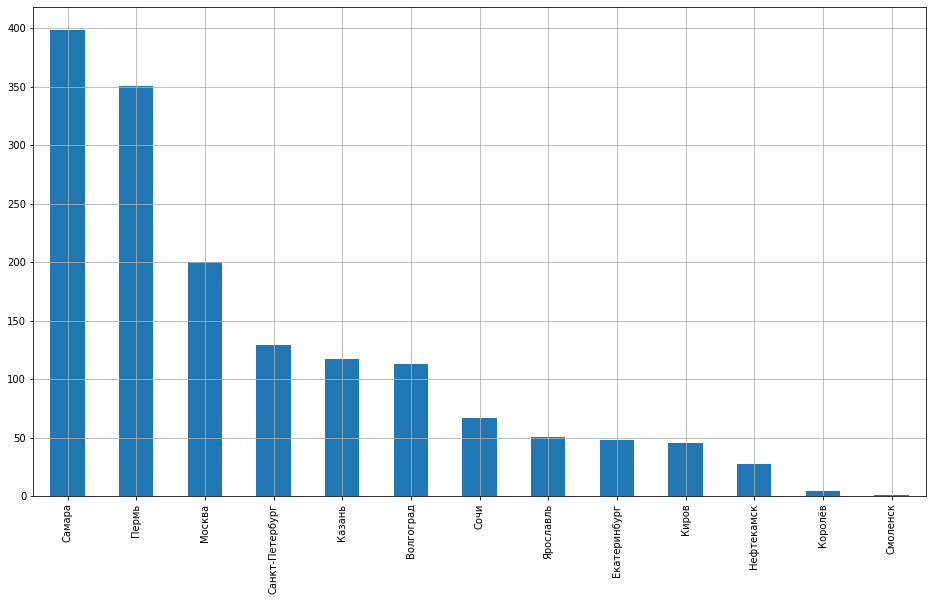

In [31]:
# количество питомцев по городам в описании
description['city'].value_counts().plot(kind = 'bar', grid=True, figsize = (16,9))
plt.show()

Впринципе, все видно на графике

In [32]:
# перведем дату в datetime формат
transaction['date'] = pd.to_datetime(transaction['date'])

### Посмотрим лайфтайм приютов


In [33]:
!pip install plotly

In [98]:
# построим интерактивный график по транзакциям по времени, иожно рассмотреть каждый приют отдельно (по-желанию)
import plotly.express as px


fig = px.line(transaction, x='date', y='amount', color='shelter')
fig.show()

Можно повыделять нужные приюты и рассмотреть их детальнее

Можно пощелкать интерактивный график,что бы посмотреть на платежи по приютам. И связать всплески с внешними факторами

##### Построим график продолжительности участия приютов в проекте:

На графике видно сроки участия в проекте приютов в днях

In [35]:
#сделаем отдельный датафрейм с необходимой информацией
shelter_activity = transaction[['date','shelter']]
#выделим первое время активности и добавим его в таблицу
first_activity_date = shelter_activity.groupby(['shelter'])['date'].min()
last_activity_date = shelter_activity.groupby(['shelter'])['date'].max()
first_activity_date.name = 'first_date'
last_activity_date.name = 'last_date'
shelter_activity = shelter_activity.merge(first_activity_date,on='shelter').merge(last_activity_date,on='shelter')
shelter_activity.head(5)

date                                 shelter first_date  last_date
0 2016-11-08  Самарский приют для животных "НадеждА" 2016-11-08 2020-04-12
1 2016-11-08  Самарский приют для животных "НадеждА" 2016-11-08 2020-04-12
2 2016-11-08  Самарский приют для животных "НадеждА" 2016-11-08 2020-04-12
3 2016-11-08  Самарский приют для животных "НадеждА" 2016-11-08 2020-04-12
4 2016-11-08  Самарский приют для животных "НадеждА" 2016-11-08 2020-04-12

In [36]:
#сделаем таблицу с датой первой и последней активности
shelter_days = shelter_activity.groupby(['shelter']).agg({'first_date':'min','last_date':'max'}).reset_index()


shelter_days['lifetime'] = shelter_days['last_date'] - shelter_days['first_date']

shelter_days.head(5)

shelter first_date  last_date lifetime
0         4 лапы 2019-08-13 2020-04-11 242 days
1  Добрые сердца 2019-07-05 2020-04-13 283 days
2         Ковчег 2016-11-08 2016-11-08   0 days
3      Кот и Пёс 2018-04-19 2020-04-12 724 days
4    Котланд-Ярд 2020-03-13 2020-04-13  31 days


##### График присутсвия приютов на платформе

In [37]:
#посмотрим активности приютов на таймлайн
import plotly.figure_factory as ff

df = shelter_days.sort_values(by = 'lifetime')
df.columns = ['Task','Start','Finish','lifetime']
fig = ff.create_gantt(df,bar_width=0.4, showgrid_x=True, showgrid_y=True, colors=['#1f77b4'], width=1200, height=1000)
fig.show()

<a id="4"></a>
# Проверка гипотез

In [38]:
#выделим необходимые столбцы для анализа
df_trans = transaction[['pet_name','id_pet','order_type','amount','date','transaction_id']]
df_des = description[['id_pet','shelter','city','bride','species','sex']]
df_trans.head(5)

pet_name  id_pet                               order_type  amount  \
0   Мадлен       1  Игрушка для кошек "Танцующая дразнилка"    95.0   
1   Мадлен       1        Игрушка для кошки "Зооник Шуршик"    45.0   
2   Мадлен       1    Корм Gemon с курицей и рисом 1 порция    30.0   
3   Мадлен       1    Корм Gemon с курицей и рисом 1 порция    30.0   
4   Мадлен       1    Корм Gemon с курицей и рисом 1 порция    30.0   

        date  transaction_id  
0 2016-11-08            5944  
1 2016-11-08            5945  
2 2016-11-08            5946  
3 2016-11-08            5947  
4 2016-11-08            5948

In [39]:
#сделаем общую таблицу для дальнейшего анализа. 
data_all = pd.merge(df_trans,df_des, on = 'id_pet')
data_all.sample(5)

pet_name  id_pet               order_type  amount       date  \
44003     Фанни     672               КотоНеделя   825.0 2018-10-09   
61138  Микробик    1014               1 ПёсоДень   145.0 2019-06-24   
17845   Бальзак     272  Корм с курицей и рисом     32.0 2017-08-24   
18802     Флора     291               1 КотоДень    98.0 2019-07-18   
31424     Конор     512               1 КотоДень    98.0 2019-08-21   

       transaction_id                                 shelter    city  \
44003           32238                               Матроскин   Пермь   
61138           43191                              Мокрый нос   Киров   
17845           15876  Самарский приют для животных "НадеждА"  Самара   
18802           45282  Самарский приют для животных "НадеждА"  Самара   
31424           47305  Самарский приют для животных "НадеждА"  Самара   

            bride species      sex  
44003  Без породы   Кошки  девочка  
61138  Без породы  Собаки  мальчик  
17845  Без породы   Кошки  мальчик  
18802  Без породы   Кошки  девочка  
31424  Без породы   Кошки  мальчик

In [40]:
transaction.query('id_pet == 1564')

pet_name  id_pet    shelter                  order_type  amount  \
81512   Эрмоса    1564  Лёхин дом  Биохимический анализ крови   300.0   
81519   Эрмоса    1564  Лёхин дом  Биохимический анализ крови   100.0   
81523   Эрмоса    1564  Лёхин дом  Биохимический анализ крови   100.0   

                 datetime  transaction_id       date  
81512 2020-04-13 00:25:40           66873 2020-04-13  
81519 2020-04-13 10:18:23           66889 2020-04-13  
81523 2020-04-13 10:46:21           66892 2020-04-13

In [41]:
# Выведем транзакции, питомцев в котрых нет в описании
pet_des_out =transaction[~transaction['id_pet'].isin(description['id_pet'])]
pet_des_out

pet_name  id_pet                shelter  \
81443     Чаплин    1562  Кошачий приют "ДОМИК"   
81450  Одуванчик    1561  Кошачий приют "ДОМИК"   
81451     Чаплин    1562  Кошачий приют "ДОМИК"   
81452   Мурлышка    1563  Кошачий приют "ДОМИК"   
81458     Чаплин    1562  Кошачий приют "ДОМИК"   
81471   Мурлышка    1563  Кошачий приют "ДОМИК"   
81477  Одуванчик    1561  Кошачий приют "ДОМИК"   
81478   Мурлышка    1563  Кошачий приют "ДОМИК"   
81505       Шайн    1565              Лёхин дом   
81507       Шайн    1565              Лёхин дом   
81509  Одуванчик    1561  Кошачий приют "ДОМИК"   
81510   Мурлышка    1563  Кошачий приют "ДОМИК"   
81512     Эрмоса    1564              Лёхин дом   
81513       Шайн    1565              Лёхин дом   
81516  Одуванчик    1561  Кошачий приют "ДОМИК"   
81517   Мурлышка    1563  Кошачий приют "ДОМИК"   
81519     Эрмоса    1564              Лёхин дом   
81520       Шайн    1565              Лёхин дом   
81523     Эрмоса    1564              Лёхин дом   

                              order_type  amount            datetime  \
81443        Избавить питомца от глистов   185.0 2020-04-12 10:34:00   
81450           Избавить питомца от блох   100.0 2020-04-12 12:38:58   
81451                           Витамины   100.0 2020-04-12 12:38:58   
81452                           Витамины   100.0 2020-04-12 12:38:58   
81458                           Витамины   447.0 2020-04-12 13:56:44   
81471        Избавить питомца от глистов   185.0 2020-04-12 16:58:37   
81477           Избавить питомца от блох   200.0 2020-04-12 18:30:51   
81478                           Витамины   100.0 2020-04-12 18:30:51   
81505  Влажный корм Royal Canin Recovery   500.0 2020-04-12 22:50:59   
81507  Влажный корм Royal Canin Recovery  2034.0 2020-04-12 23:00:41   
81509           Избавить питомца от блох   300.0 2020-04-13 00:25:40   
81510                           Витамины   200.0 2020-04-13 00:25:40   
81512         Биохимический анализ крови   300.0 2020-04-13 00:25:40   
81513                        УЗИ питомца   200.0 2020-04-13 00:25:40   
81516           Избавить питомца от блох   100.0 2020-04-13 10:18:23   
81517                           Витамины   147.0 2020-04-13 10:18:23   
81519         Биохимический анализ крови   100.0 2020-04-13 10:18:23   
81520                        УЗИ питомца   100.0 2020-04-13 10:18:23   
81523         Биохимический анализ крови   100.0 2020-04-13 10:46:21   

       transaction_id       date  
81443           66781 2020-04-12  
81450           66790 2020-04-12  
81451           66790 2020-04-12  
81452           66790 2020-04-12  
81458           66798 2020-04-12  
81471           66809 2020-04-12  
81477           66815 2020-04-12  
81478           66815 2020-04-12  
81505           66862 2020-04-12  
81507           66865 2020-04-12  
81509           66873 2020-04-13  
81510           66873 2020-04-13  
81512           66873 2020-04-13  
81513           66873 2020-04-13  
81516           66889 2020-04-13  
81517           66889 2020-04-13  
81519           66889 2020-04-13  
81520           66889 2020-04-13  
81523           66892 2020-04-13

<a id="10"></a>
### Проверим гипотезу средний чек для собак отличается от срежнего на кошек

In [42]:
dogs = data_all.query('species == "Собаки"')
dogs.head(5)

pet_name  id_pet      order_type  amount       date  transaction_id  \
2590   Бабуля      17  Биохимия крови    50.0 2016-11-08            7101   
2591   Бабуля      17  Биохимия крови   500.0 2016-11-08            7102   
2592   Бабуля      17  Биохимия крови    50.0 2016-11-08            7103   
2593   Бабуля      17  Биохимия крови    50.0 2016-11-08            7104   
2594   Бабуля      17  Биохимия крови    50.0 2016-11-08            7105   

                                  shelter    city             bride species  \
2590  Стационар для Животных "Сен Бернар"  Самара  Немецкая овчарка  Собаки   
2591  Стационар для Животных "Сен Бернар"  Самара  Немецкая овчарка  Собаки   
2592  Стационар для Животных "Сен Бернар"  Самара  Немецкая овчарка  Собаки   
2593  Стационар для Животных "Сен Бернар"  Самара  Немецкая овчарка  Собаки   
2594  Стационар для Животных "Сен Бернар"  Самара  Немецкая овчарка  Собаки   

          sex  
2590  девочка  
2591  девочка  
2592  девочка  
2593  девочка  
2594  девочка

In [43]:
cats = data_all.query('species == "Кошки"')
cats.head(5)

pet_name  id_pet                               order_type  amount  \
0   Мадлен       1  Игрушка для кошек "Танцующая дразнилка"    95.0   
1   Мадлен       1        Игрушка для кошки "Зооник Шуршик"    45.0   
2   Мадлен       1    Корм Gemon с курицей и рисом 1 порция    30.0   
3   Мадлен       1    Корм Gemon с курицей и рисом 1 порция    30.0   
4   Мадлен       1    Корм Gemon с курицей и рисом 1 порция    30.0   

        date  transaction_id                                 shelter    city  \
0 2016-11-08            5944  Самарский приют для животных "НадеждА"  Самара   
1 2016-11-08            5945  Самарский приют для животных "НадеждА"  Самара   
2 2016-11-08            5946  Самарский приют для животных "НадеждА"  Самара   
3 2016-11-08            5947  Самарский приют для животных "НадеждА"  Самара   
4 2016-11-08            5948  Самарский приют для животных "НадеждА"  Самара   

        bride species      sex  
0  Без породы   Кошки  девочка  
1  Без породы   Кошки  девочка  
2  Без породы   Кошки  девочка  
3  Без породы   Кошки  девочка  
4  Без породы   Кошки  девочка

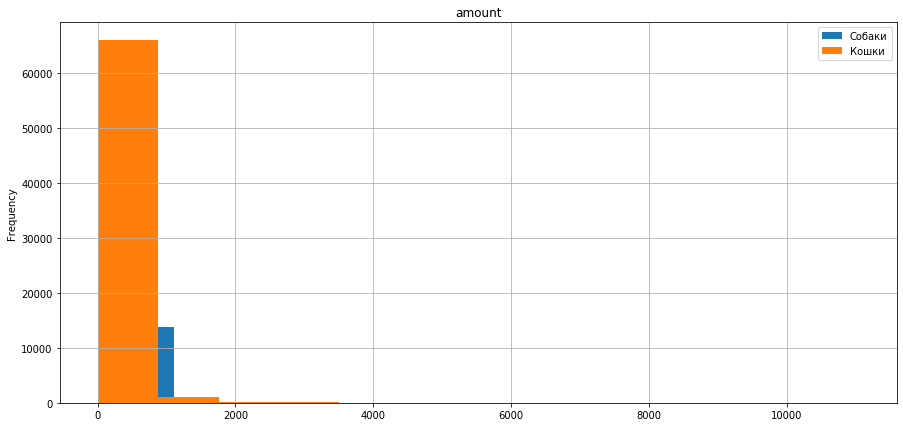

In [44]:
cols = ['amount']

for col in cols:
    fig, axes = plt.subplots(figsize=(15,7))
    plt.ylabel(col)
    plt.title(col)
    data_all.query('species == "Собаки"')[col].plot(  kind = 'hist', grid = True, bins = 10,  title= col )
    data_all.query('species == "Кошки"')[col].plot(  kind = 'hist', grid = True, bins =10,  title= col )
    plt.legend(('Собаки','Кошки'))
    plt.show

Распределение средних по транзакциям

##### Рассчитаем среднее по видам:

In [45]:
mean_cats = cats[['amount']]
mean_dogs = dogs[['amount']]
print('средний чек Коты',mean_cats.mean() )
print()
print('средний чек Собаки',mean_dogs.mean() )

средний чек Коты amount    162.517457
dtype: float64

средний чек Собаки amount    238.781955
dtype: float64


###### Cчитаем дисперсию:

In [46]:
var_amount_cats = np.var(mean_cats, ddof=1)
print('Дисперсия по котам:',var_amount_cats)

Дисперсия по котам: amount    77502.159124
dtype: float64


In [47]:
var_amount_dogs = np.var(mean_dogs, ddof=1)
print('Дисперсия по собакам:',var_amount_dogs)

Дисперсия по собакам: amount    128538.688527
dtype: float64


##### Доверительный интервал:

In [48]:
#функция расчета доверительного интервала
def compute_ci(sample):
    """Функция расчитывает доверительный интервал, в качестве аргумента необходимо внести массив по которому требуется расчеты"""
    st_dev = np.std(sample)
    z_value = st.norm.ppf(q=0.975)
    sample_size = len(sample)
    interval = z_value * (st_dev/np.sqrt(sample_size))
    conf_inv = (sample.mean() - interval, sample.mean() + interval)
    
    return conf_inv

### Рассчитаем дов интервал для поступлений всех питомцеы

In [49]:
#рассчитаем дов интервал для поступлений всех питомцеы
compute_ci(data_all['amount'])

(173.63628256756496, 177.68905580412863)

###### Рассчитаем дов интервал для кошек и собак

In [50]:
#рассчитаем дов интервал для кошек
compute_ci(cats['amount'])

(160.41667137590014, 164.61824346126087)

In [51]:
#собак
compute_ci(dogs['amount'])

(232.85369980877226, 244.71020936625786)

##### Зададим критический уровень статистической значимости и проверим гипотезу о равенстве средних двух независимых совокупностей, дисперсии выборок считаем не равными

In [52]:
# Зададим критический уровень статистической значимости
alpha = 0.05    
# проверим гипотезу о равенстве средних двух независимых совокупностей, дисперсии выборок считаем не равными
results =  st.ttest_ind(
    mean_cats, 
    mean_dogs, equal_var = False)

 # выведем на экран получившееся p-значение)
print('p-значение:', results.pvalue) 
# всравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):  
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [6.34138509e-123]
Отвергаем нулевую гипотезу


##### Можно сделать вывод, что средний чек кошек и собак отличается

##### Проведем исследование о различии среднего чека в непродуктовых транзакциях

##### Подготовим данные

In [53]:
#выделем все строки с кормами
food_ops = (data_all.query('order_type.str.contains("День") or order_type.str.contains("корм") or order_type.str.contains("день") or order_type.str.contains("Корм") or order_type.str.contains("Неделя") or order_type.str.contains("Набор") or order_type.str.contains("вкус")', engine='python'))


In [54]:
# и исключим из из дата сета
notfood_ops = data_all.query('order_type not in @food_ops.order_type', engine='python') 


In [55]:
# сделаем датасет на собак
dogs_nofood = notfood_ops.query('species == "Собаки"')
dogs_nofood.head(5)

pet_name  id_pet      order_type  amount       date  transaction_id  \
2590   Бабуля      17  Биохимия крови    50.0 2016-11-08            7101   
2591   Бабуля      17  Биохимия крови   500.0 2016-11-08            7102   
2592   Бабуля      17  Биохимия крови    50.0 2016-11-08            7103   
2593   Бабуля      17  Биохимия крови    50.0 2016-11-08            7104   
2594   Бабуля      17  Биохимия крови    50.0 2016-11-08            7105   

                                  shelter    city             bride species  \
2590  Стационар для Животных "Сен Бернар"  Самара  Немецкая овчарка  Собаки   
2591  Стационар для Животных "Сен Бернар"  Самара  Немецкая овчарка  Собаки   
2592  Стационар для Животных "Сен Бернар"  Самара  Немецкая овчарка  Собаки   
2593  Стационар для Животных "Сен Бернар"  Самара  Немецкая овчарка  Собаки   
2594  Стационар для Животных "Сен Бернар"  Самара  Немецкая овчарка  Собаки   

          sex  
2590  девочка  
2591  девочка  
2592  девочка  
2593  девочка  
2594  девочка

In [56]:
cats_nofood = notfood_ops.query('species == "Кошки"')
cats_nofood.head(5)

pet_name  id_pet                               order_type  amount  \
0   Мадлен       1  Игрушка для кошек "Танцующая дразнилка"    95.0   
1   Мадлен       1        Игрушка для кошки "Зооник Шуршик"    45.0   
6   Мадлен       1                             Стерилизация  2500.0   
7     Фифа       2                              Royal Canin    54.0   
8     Фифа       2           Стоморджил (для лечения зубов)   100.0   

        date  transaction_id                                 shelter  \
0 2016-11-08            5944  Самарский приют для животных "НадеждА"   
1 2016-11-08            5945  Самарский приют для животных "НадеждА"   
6 2016-11-08            5954  Самарский приют для животных "НадеждА"   
7 2016-11-08            5949                                  Ковчег   
8 2016-11-08            5950                                  Ковчег   

       city       bride species      sex  
0    Самара  Без породы   Кошки  девочка  
1    Самара  Без породы   Кошки  девочка  
6    Самара  Без породы   Кошки  девочка  
7  Смоленск    Мейн-кун   Кошки  девочка  
8  Смоленск    Мейн-кун   Кошки  девочка

##### График распределения платежей

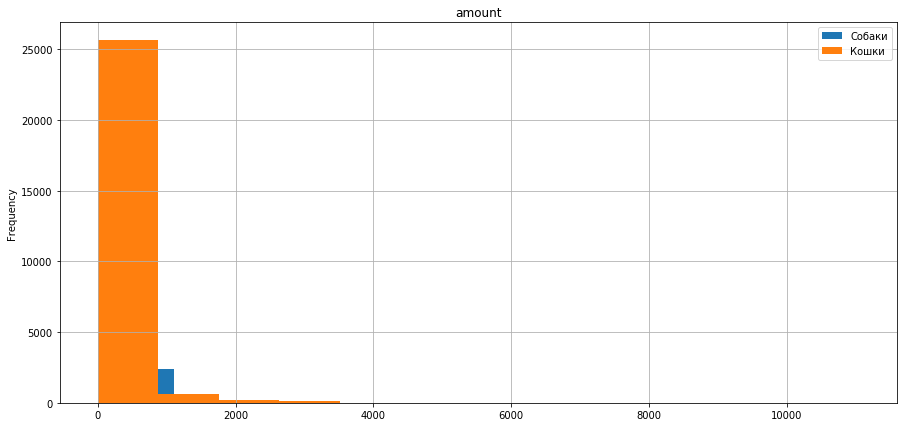

In [57]:
cols = ['amount']

for col in cols:
    fig, axes = plt.subplots(figsize=(15,7))
    plt.ylabel(col)
    plt.title(col)
    notfood_ops.query('species == "Собаки"')[col].plot(  kind = 'hist', grid = True, bins = 10,  title= col )
    notfood_ops.query('species == "Кошки"')[col].plot(  kind = 'hist', grid = True, bins =10,  title= col )
    plt.legend(('Собаки','Кошки'))
    plt.show

График не особо информативен

##### Рассчитаем среднее по видам 


In [58]:
#рассчитаем среднее по видам 
mean_cats_nf = cats_nofood[['amount']]
mean_dogs_nf = dogs_nofood[['amount']]
print('средний чек Коты',mean_cats_nf.mean() )
print()
print('средний чек Собаки',mean_dogs_nf.mean() )

средний чек Коты amount    190.245712
dtype: float64

средний чек Собаки amount    317.076906
dtype: float64


##### Считаем дисперсию

In [59]:
#считаем дисперсию
var_amount_cats = np.var(mean_cats_nf, ddof=1)
var_amount_cats

amount    128856.69664
dtype: float64

In [60]:
var_amount_dogs = np.var(mean_dogs_nf, ddof=1)
var_amount_dogs

amount    436706.282788
dtype: float64

##### Рассчитаем дов интервал для поступлений всех питомцеы

In [61]:
#рассчитаем дов интервал для поступлений всех питомцеы
compute_ci(notfood_ops['amount'])

(196.6393385908225, 205.74741238260958)

In [62]:
#рассчитаем дов интервал для кошек
compute_ci(cats_nofood['amount'])

(185.92515846346222, 194.56626558239626)

In [63]:
#собак
compute_ci(dogs_nofood['amount'])

(291.20358122883067, 342.9502311464189)

##### Зададим критический уровень статистической значимости и проверим гипотезу о равенстве средних двух независимых совокупностей, дисперсии выборок считаем не равными

In [64]:
# Зададим критический уровень статистической значимости
alpha = 0.05    
# проверим гипотезу о равенстве средних двух независимых совокупностей, дисперсии выборок считаем не равными
results =  st.ttest_ind(
    mean_cats_nf, 
    mean_dogs_nf, equal_var = False)

In [65]:
 # выведем на экран получившееся p-значение)
print('p-значение:', results.pvalue) 
# всравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):  
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [5.72889853e-21]
Отвергаем нулевую гипотезу


##### Также можно сделать вывод, что средний непищевой чек кошек и собак отличается

<a id="11"></a>
### Взглянем на отличия по половому признаку у котов, гипотезу средния транзакция кота и кошки отличается

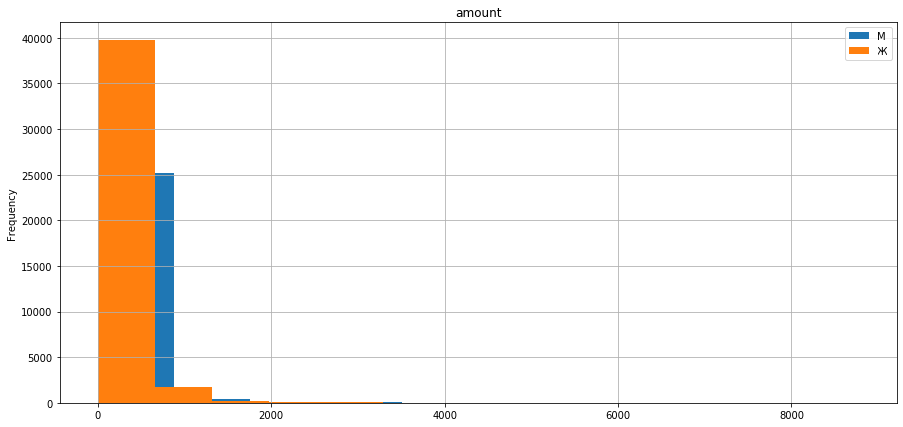

In [66]:
cols = ['amount']

for col in cols:
    fig, axes = plt.subplots(figsize=(15,7))
    plt.ylabel(col)
    plt.title(col)
    cats.query('sex == "мальчик"')[col].plot(  kind = 'hist', grid = True, bins = 10,  title= col )
    cats.query('sex == "девочка"')[col].plot(  kind = 'hist', grid = True, bins =10,  title= col )
    plt.legend(('М','Ж'))
    plt.show

##### Рассчитаем среднее по полам 

In [67]:
#рассчитаем среднее по полам 
mean_boy = cats.query('sex == "мальчик"')[['amount']]
mean_girl = cats.query('sex == "девочка"')[['amount']]
print('средний чек М',mean_boy.mean() )
print()
print('средний чек Д',mean_girl.mean() )

средний чек М amount    166.801871
dtype: float64

средний чек Д amount    159.879348
dtype: float64


##### Cчитаем дисперсию

In [68]:
#считаем дисперсию
var_amount_boy = np.var(mean_boy, ddof=1)
print('Дтсперсия Boy', var_amount_boy)
print()
var_amount_girl = np.var(mean_girl, ddof=1)
print('Дтсперсия Girl', var_amount_girl)

Дтсперсия Boy amount    81783.256768
dtype: float64

Дтсперсия Girl amount    74849.724456
dtype: float64


In [69]:
compute_ci(cats.query('sex == "мальчик"')[['amount']])

(amount    163.306143
 dtype: float64, amount    170.2976
 dtype: float64)

In [70]:
compute_ci(cats.query('sex == "девочка"')[['amount']])

(amount    157.255102
 dtype: float64, amount    162.503594
 dtype: float64)

##### Зададим критический уровень статистической значимости и проверим гипотезу о равенстве средних двух независимых совокупностей, дисперсии выборок считаем не равнымиь

In [71]:
# Зададим критический уровень статистической значимости
alpha = 0.05   
# проверим гипотезу о равенстве средних двух независимых совокупностей, дисперсии выборок считаем не равными
results =  st.ttest_ind(
    mean_boy, 
    mean_girl, equal_var = False)

 # выведем на экран получившееся p-значение)
print('p-значение:', results.pvalue) 
# всравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):  
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.00191072]
Отвергаем нулевую гипотезу


##### Средний чек по полам котов отличается

##### Проверим гипотезу : средний чек мальчиков и девочек собак отличается

##### Рассчитаем среднее по полам  собак

In [72]:
#рассчитаем среднее по полам  собак
mean_boy_d = dogs.query('sex == "мальчик"')[['amount']]
mean_girl_d = dogs.query('sex == "девочка"')[['amount']]
print('средний чек М',mean_boy_d.mean() )
print()
print('средний чек Д',mean_girl_d.mean() )

средний чек М amount    244.571834
dtype: float64

средний чек Д amount    233.710302
dtype: float64


##### Зададим критический уровень статистической значимости и  проверим гипотезу о равенстве средних двух независимых совокупностей, дисперсии выборок считаем не равными

In [73]:
# Зададим критический уровень статистической значимости
alpha = 0.05   
# проверим гипотезу о равенстве средних двух независимых совокупностей, дисперсии выборок считаем не равными
results =  st.ttest_ind(
    mean_boy_d, 
    mean_girl_d, equal_var = False)

 # выведем на экран получившееся p-значение)
print('p-значение:', results.pvalue) 
# всравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):  
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.07418282]
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средний чек по половому признаку собак слегка неодинаков, с вероятностью в почти 7,4% такое различие можно получить случайно. Это явно слишком большая вероятность( больше уровня стат значимости), чтобы делать вывод о значимом различии.

<a id="5"></a>
# Транзакции


### Посчитаем средние чеки, медиану чеков, количеcтво транзакий по городам

<a id="8"></a>
##### Рассмотрим разброс сумм в транзакциях

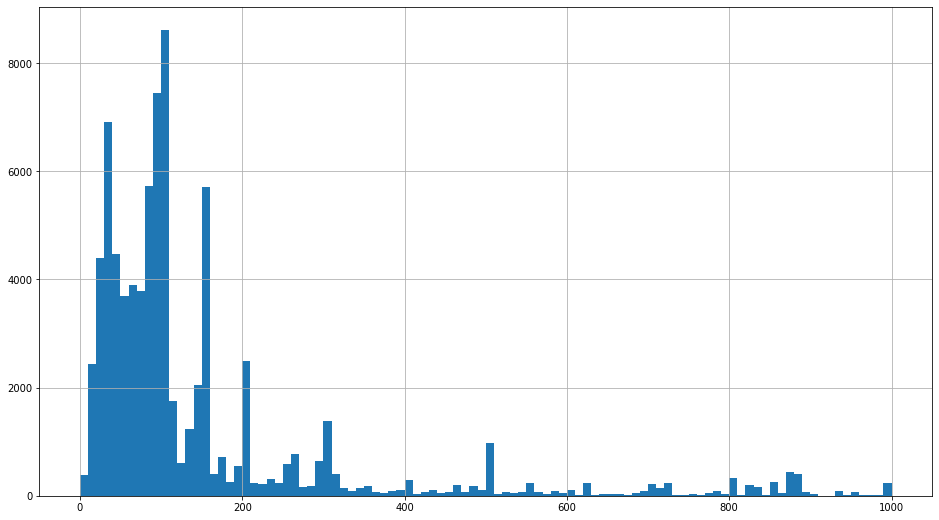

In [74]:
#посмторим гист платежей
transaction.amount.hist(bins = 100, range = (0,1000),  figsize = (16,9))
plt.show()

Самое частое значение транзакции 100 р

In [75]:
print(transaction.amount.mode(),
transaction.amount.median(),
transaction.amount.mean())

0    98.0
dtype: float64 98.0 175.6891684963264


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BE7CD48>]],
      dtype=object)

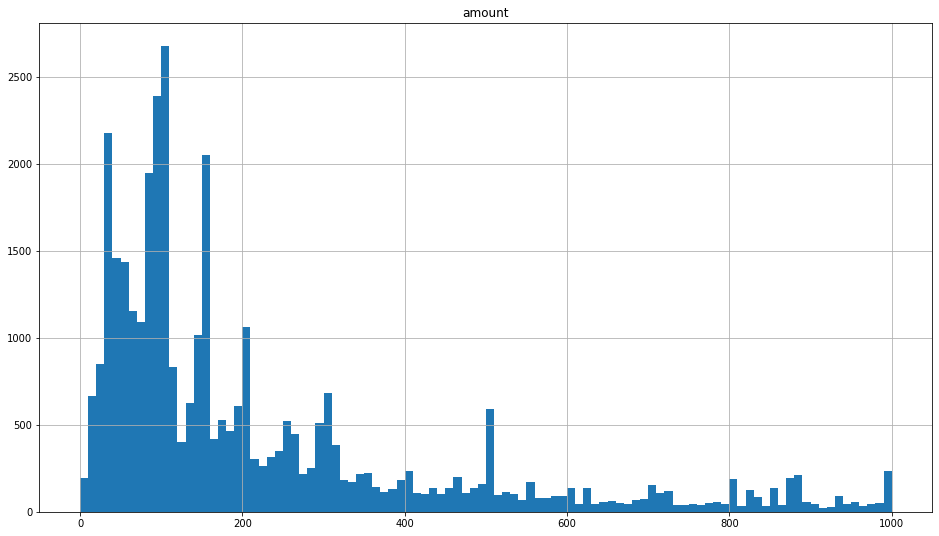

In [76]:
transaction.groupby(['transaction_id']).agg({'amount':'sum'}).hist(bins = 100, range = (0,1000),  figsize = (16,9))

In [77]:
transaction.groupby(['transaction_id']).agg({'amount':'sum'}).mode()

amount
0    98.0

##### Транзакции сильно совпадают с заказми


##### Рассмотрим далее заказы по сумма и количеству транзакций

In [78]:
order_dict = transaction.order_type.value_counts().head(30)
order_dict

1 КотоДень                                15476
КотоДень                                   9159
1 ПёсоДень                                 5070
Наполнитель для туалета                    3352
Порция вкуснейшего корма                   3217
Наполнитель для туалета (1 порция)         3103
Дневная порция вкуснейшего корма           2857
Стерилизация                               2714
ПёсоДень                                   2234
Порция корма                               2200
Корм с курицей и рисом                     2168
Рекламировать питомца (пакет Mini)         2081
Корм с курицей и рисом (1 порция)          1388
1 КотоНеделя                               1211
КотоНеделя                                 1172
Рекламировать питомца (пакет Standart)     1102
Избавить питомца от блох                   1040
Кастрация питомца                           991
Избавить питомца от глистов                 886
Защитить питомца от вирусов                 702
 Новогодний КотоНабор                   

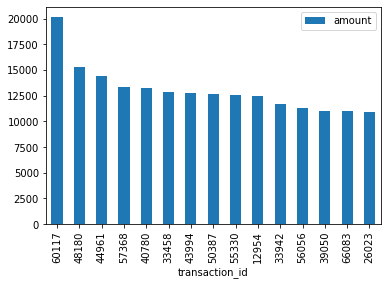

In [79]:
# выберем самые дорогие заказы
transaction.groupby(['transaction_id']).agg({'amount':'sum'}).sort_values(by = 'amount', ascending = False).head(15).plot(kind = 'bar')
plt.show()

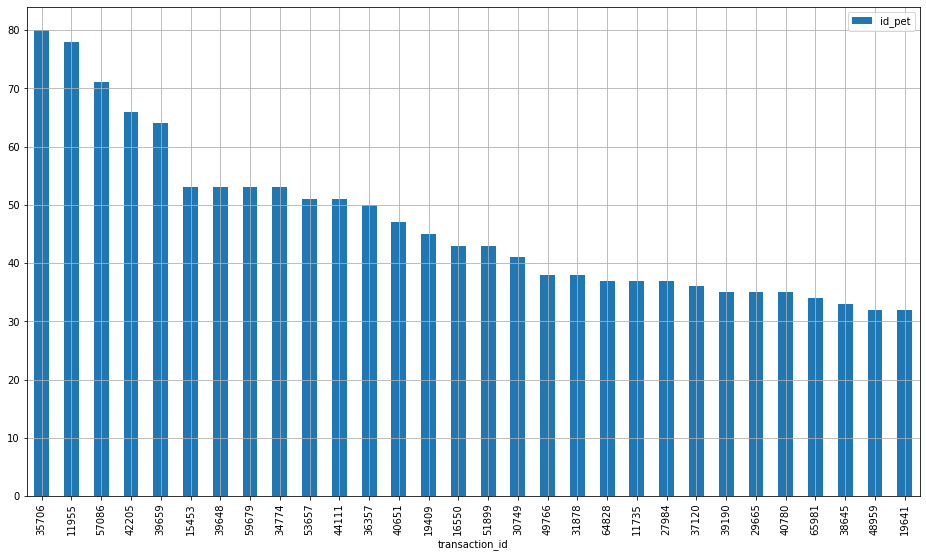

In [80]:
# выберем самые  'количественные'
transaction.groupby(['transaction_id']).agg({'id_pet':'count'}).sort_values(by = 'id_pet', ascending = False).head(30).plot(kind = 'bar', grid = True, figsize = (16,9))
plt.show()

видим максимум до 80 питомцев в одном заказе

In [81]:
#посмотрим сколько их в  среднем
print('В среднем питомцев в заказе:',(transaction.groupby(['transaction_id']).agg({'id_pet':'count'})
                                      .sort_values(by = 'id_pet', ascending = False)
                                      .reset_index())['id_pet']
      .mean())

В среднем питомцев в заказе: 2.112262611083763


##### Макс закакз был на 20000, 80 транзакций в заказе было макс

In [82]:
# подготовим данные для расчетов платежей по городам
city_pay = data_all.groupby(['city']).agg({'amount':['mean','median','count']}).sort_values([('amount', 'mean')], ascending = False)
city_pay = city_pay.reset_index()
city_pay.columns = ['city','pay_mean','pay_median','pay_count']

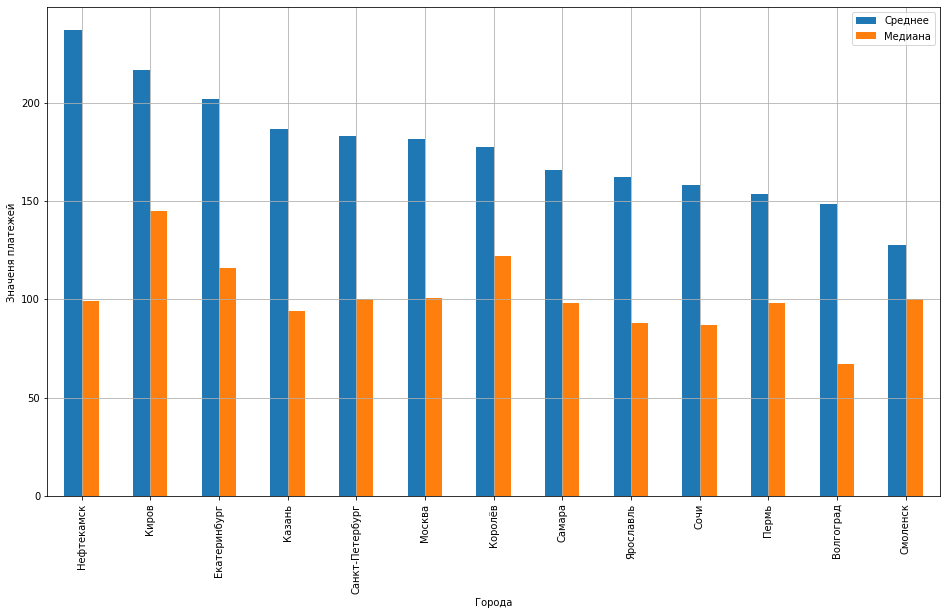

In [83]:
# построим графики
city_pay.plot(x= 'city', y = ['pay_mean','pay_median'], kind = 'bar',grid = True, figsize = (16,9))
plt.xlabel('Города')
plt.ylabel('Значеня платежей')
plt.legend(('Среднее', 'Медиана'))
plt.show()

In [84]:
data_all.groupby(['transaction_id','city']).agg({'amount':'sum'}).reset_index()

transaction_id             city  amount
0                5944           Самара    95.0
1                5945           Самара    45.0
2                5946           Самара    30.0
3                5947           Самара    30.0
4                5948           Самара    30.0
...               ...              ...     ...
54885           66889  Санкт-Петербург   553.0
54886           66891  Санкт-Петербург   135.0
54887           66895  Санкт-Петербург    61.0
54888           66896       Нефтекамск   109.0
54889           66896            Пермь   108.0

[54890 rows x 3 columns]

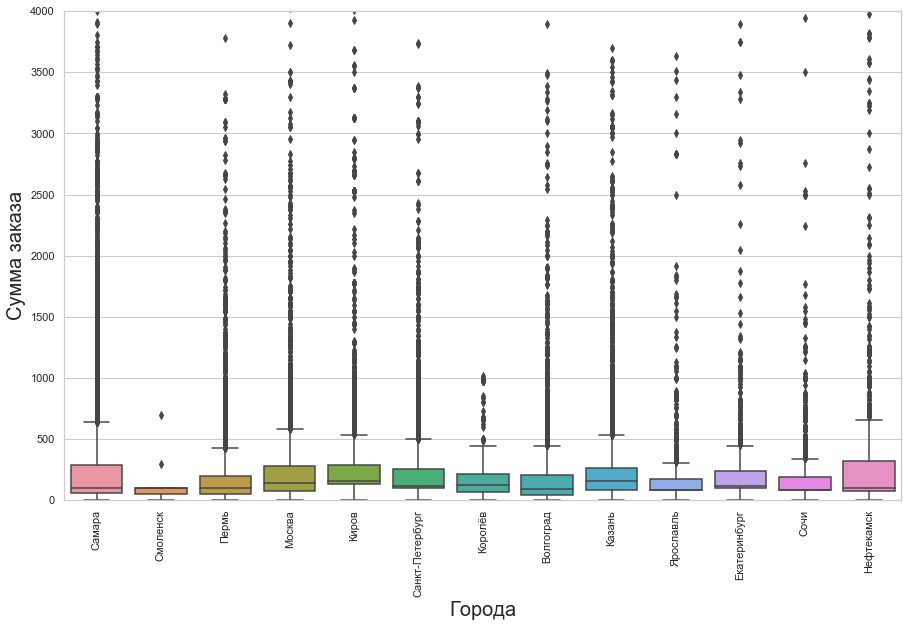

In [85]:
# взглянем на выбросы
sns.set(style="whitegrid")
df = data_all.groupby(['transaction_id','city']).agg({'amount':'sum'}).reset_index()
fig, ax = plt.subplots(figsize = (15,9))
ax = sns.boxplot(x = 'city', y = 'amount', data = df)
ax.set_ylabel('Сумма заказа',fontsize=20)
ax.set_xlabel('Города',fontsize=20)
plt.ylim(0,4000)
plt.xticks(rotation=90 )
plt.show()

Также видно большое количество выбросов по заказам, хотя медиана идет в районе 100-200 р, есть выбросы более 10000

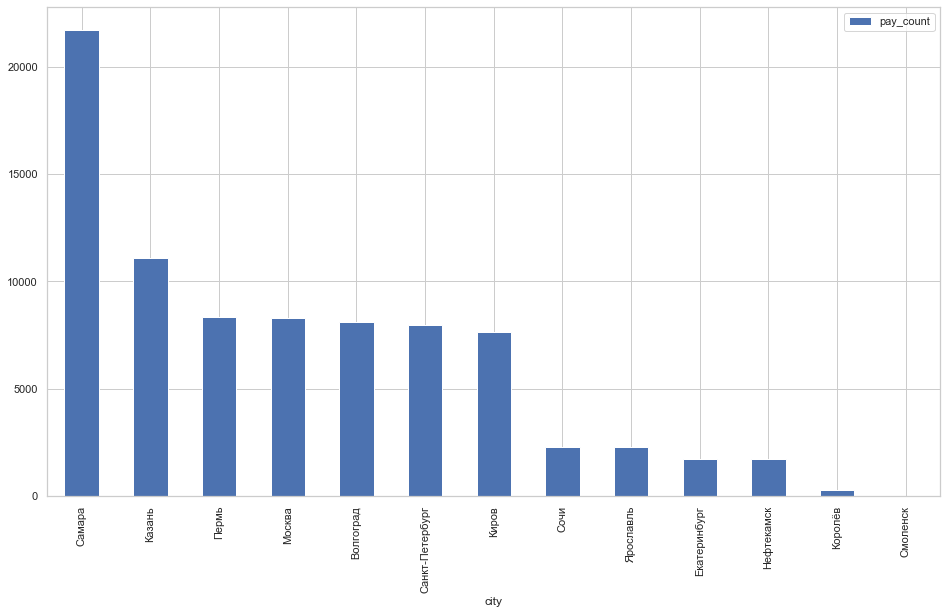

In [86]:
#посчитаем транзакции по городам
city_pay.sort_values('pay_count', ascending = False).plot(x= 'city', y = ['pay_count'], kind = 'bar',grid = True, figsize = (16,9))
plt.show()

<a id="14"></a>
### Посчитаем еще количество операций в день по приютам и всего приютов по дням в проекте

In [87]:
#посмотрим сколько за все годы было приютов и сравним их количество в вдух таблицах
print('Приютов в descriptions:',description.shelter.nunique(),'   -   Приютов в transactions:',transaction.shelter.nunique())

Приютов в descriptions: 24    -   Приютов в transactions: 24


In [97]:
# подготовим датасет с расчтеми по транзакциям
shelter_pay = data_all.groupby(['shelter']).agg({'amount':['mean','median','count']})
shelter_pay = shelter_pay.reset_index()
shelter_pay.columns = ['shelter','pay_mean','pay_median','pay_count']


In [89]:
# создадим и добавим расчтеы за день
data_shelter = shelter_days.merge(shelter_pay, on = 'shelter')
data_shelter['lifetime'] = data_shelter['lifetime'] / np.timedelta64(1,'D')
data_shelter['lifetime'] = data_shelter['lifetime'].round().astype('int')
data_shelter['lifetime'].replace(0,1,inplace=True)
data_shelter['count_per_day'] = data_shelter['pay_count']/data_shelter['lifetime']


In [90]:
# создадим и добавим расчтеы за месяц
data_shelter['lifetime_month'] = data_shelter['last_date'] - data_shelter['first_date']
data_shelter['lifetime_month'] = data_shelter['lifetime_month'] / np.timedelta64(1,'M')
data_shelter['lifetime_month'] = data_shelter['lifetime_month'].round().astype('int')
data_shelter['lifetime_month'].replace(0,1,inplace=True)
data_shelter


shelter first_date  last_date  \
0                                       4 лапы 2019-08-13 2020-04-11   
1                                Добрые сердца 2019-07-05 2020-04-13   
2                                       Ковчег 2016-11-08 2016-11-08   
3                                    Кот и Пёс 2018-04-19 2020-04-12   
4                                  Котланд-Ярд 2020-03-13 2020-04-13   
5                                      Котофей 2017-09-10 2020-04-12   
6                        Кошачий приют "ДОМИК" 2017-06-28 2020-04-13   
7                              Лаюшки и Мяушки 2019-09-26 2020-04-12   
8                                  Люськин дом 2017-12-11 2020-04-12   
9                                    Лёхин дом 2019-05-16 2020-04-13   
10                                   Матроскин 2016-11-08 2020-04-13   
11                                  Мокрый нос 2016-11-19 2020-04-12   
12                 Приют для кошек "Потеряшка" 2019-02-23 2020-04-10   
13                     Приют для кошек "ЯрКот" 2018-11-15 2020-04-12   
14              Реабилитационный центр ЗОО Дом 2017-03-30 2018-02-06   
15                            Республика котов 2017-02-09 2018-10-22   
16                            Республика кошек 2017-02-09 2018-03-23   
17      Самарский приют для животных "НадеждА" 2016-11-08 2020-04-12   
18         Стационар для Животных "Сен Бернар" 2016-11-08 2016-11-08   
19                                     Убежище 2019-06-03 2020-04-11   
20                                  ФлагманВет 2017-08-04 2020-04-10   
21  Центральный приют Спб для бездомных кошек! 2018-10-31 2020-04-13   
22          Частный Московский приют "МУРКОША" 2016-11-08 2018-10-10   
23                        Шереметьевский приют 2019-02-13 2020-04-11   

    lifetime    pay_mean  pay_median  pay_count  count_per_day  lifetime_month  
0        242  250.997672       155.0        464       1.917355               8  
1        283  236.584707        99.0       1721       6.081272               9  
2          1  127.571429       100.0         14      14.000000               1  
3        724  236.605546       155.0       4118       5.687845              24  
4         31  260.415061       105.0        247       7.967742               1  
5        945  159.047332        87.0       3017       3.192593              31  
6       1020  148.663929        67.0       8102       7.943137              34  
7        199  276.796218       155.0        825       4.145729               7  
8        853  156.687903        78.0       6991       8.195780              28  
9        333  201.787318       116.0       1745       5.240240              11  
10      1252  152.792113        98.0       7630       6.094249              41  
11      1240  216.389992       145.0       7665       6.181452              41  
12       412  170.493730       104.0       1429       3.468447              14  
13       514  162.231414        88.0       2292       4.459144              17  
14       313  177.527183       122.0        284       0.907348              10  
15       620   95.776499        66.0        894       1.441935              20  
16       407   71.413571        20.0        378       0.928747              13  
17      1251  168.500333        98.0      18752      14.989608              41  
18         1   92.412621        52.0        824     824.000000               1  
19       313  174.708396       114.0       1814       5.795527              10  
20       980  171.421137        88.0       2110       2.153061              32  
21       530  220.564051        98.0       2725       5.141509              17  
22       701  128.943406        67.0       5426       7.740371              23  
23       423  281.982621       140.0       2041       4.825059              14

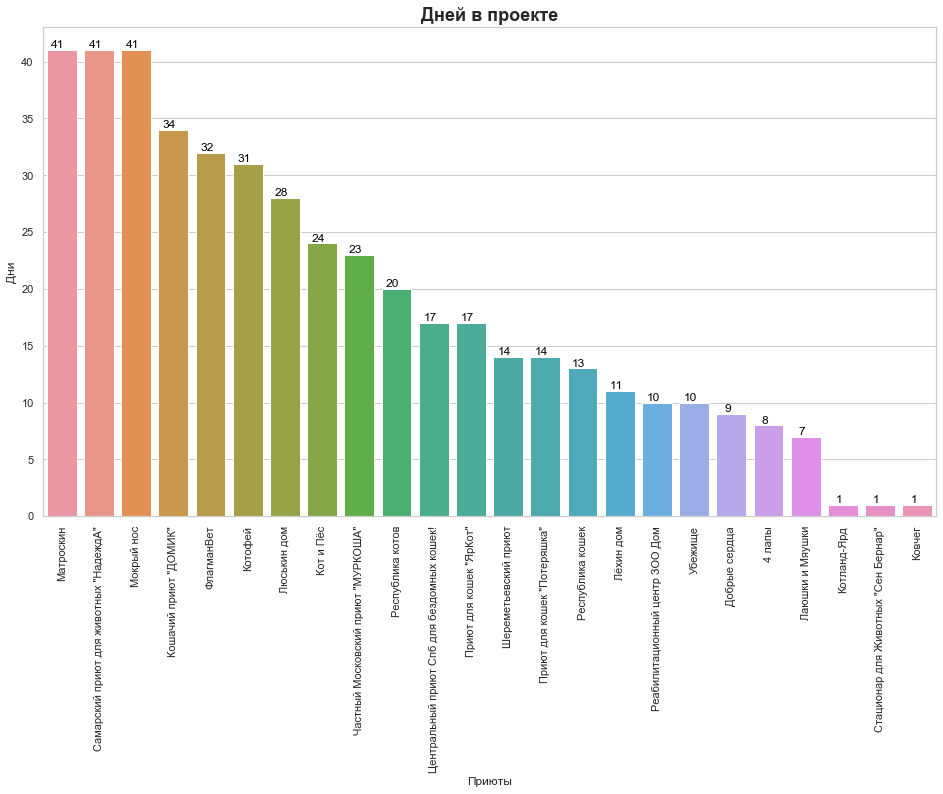

In [91]:
# построим график участия по времени приютов

plt.figure(figsize=(16,9))
ax = sns.barplot(x='shelter', y = 'lifetime_month',  data=data_shelter.sort_values('lifetime', ascending = False))
ax.set_ylabel('Дни')
ax.set_xlabel('Приюты')
ax.set_title('Дней в проекте', weight='bold').set_fontsize('18')
plt.xticks(rotation=90)
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.show()

Долгожители Матроскин, Надежда, Мокрый нос,  пару приютов по дню, недавно 4 лапы, Лаюши и Мяушки, Котланд Ярд

Из таблицы видно аномалию по приюту "Сен Бернар", придется его исключить из графика для наглядности (большое количество транзакций за день):


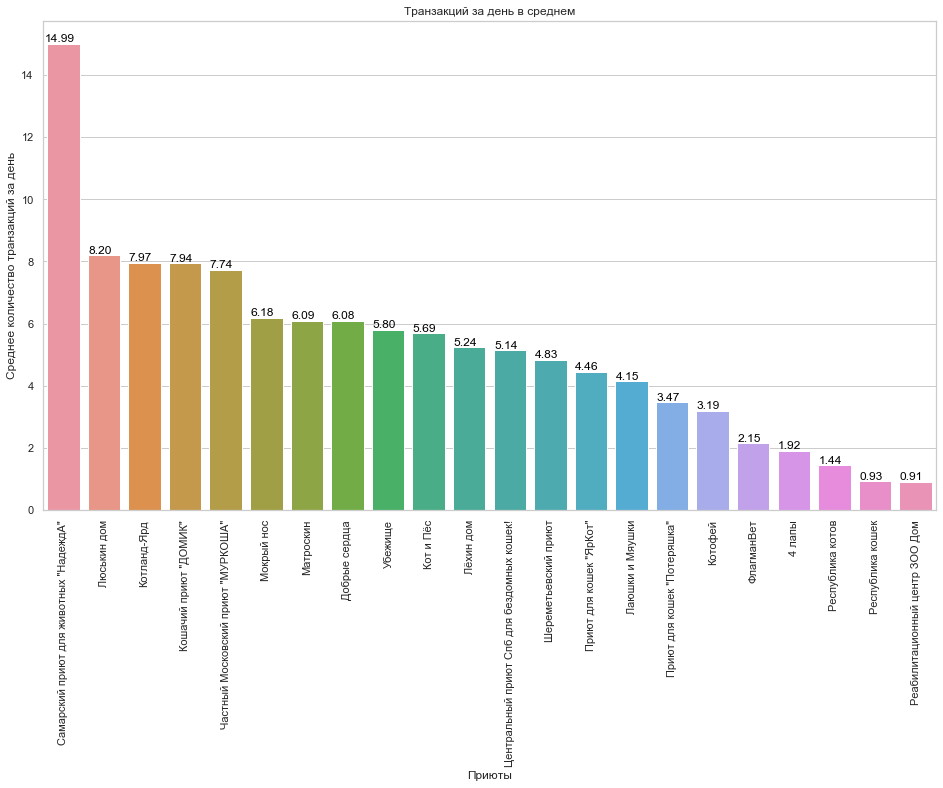

In [92]:
# график транзакций за день
plt.figure(figsize=(16,9))
ax = sns.barplot(x='shelter', y = 'count_per_day',  data=data_shelter.query('lifetime > 1').sort_values('count_per_day', ascending = False))
ax.set_ylabel('Cреднее количество транзакций за день')
ax.set_xlabel('Приюты')
ax.set_title('Транзакций за день в среднем')
plt.xticks(rotation=90)
for p in ax.patches:
       ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.show()

Всего за день больше всего операций по Надежде, Люскин дом. Котланд-Ярд, Меньше в ЗОО дом, Ремпубликах и 4 лапах

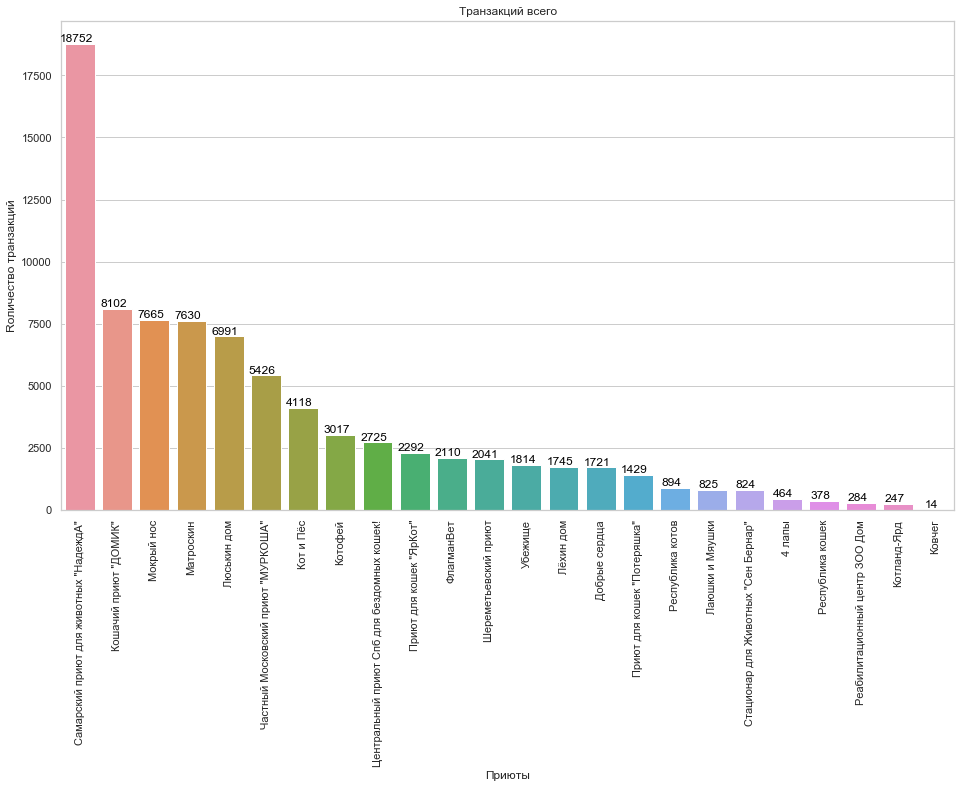

In [93]:
# график транзакций всего по приютам
plt.figure(figsize=(16,9))
ax = sns.barplot(x='shelter', y = 'pay_count',  data=data_shelter.sort_values('pay_count', ascending = False))
ax.set_ylabel('Rоличество транзакций')
ax.set_xlabel('Приюты')
ax.set_title('Транзакций всего')
plt.xticks(rotation=90)
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.show()

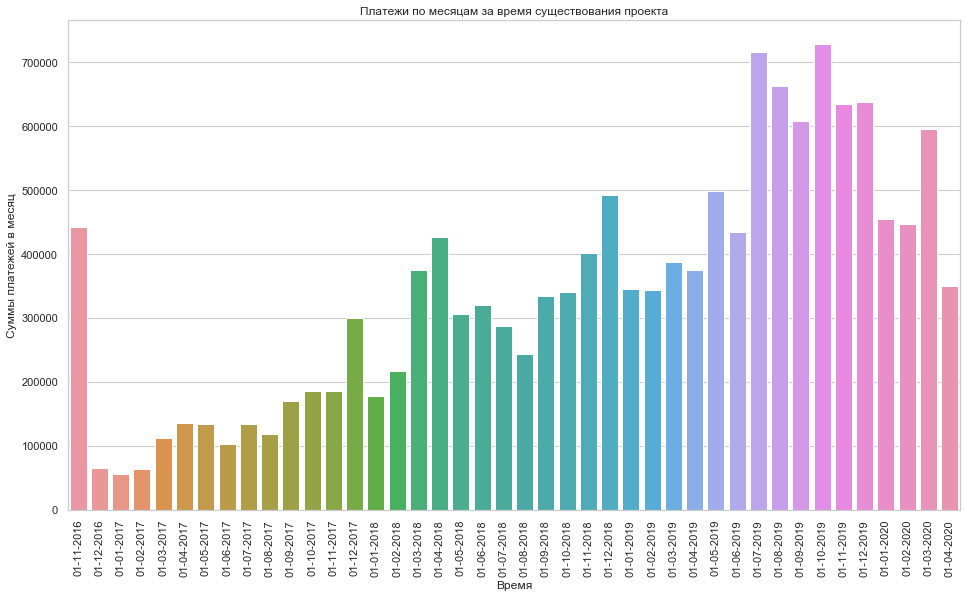

In [94]:
# построим график сумм платежей в месяц по всем приютам
transaction['month'] = transaction['date'].astype('datetime64[M]')
df = transaction.groupby(['month']).agg({'amount':'sum'}).reset_index()
plt.figure(figsize=(16,9))
ax = sns.barplot(x='month', y='amount', data = df)
ax.set_ylabel('Суммы платежей в месяц')
ax.set_xlabel('Время')
ax.set_xticklabels(df['month'].dt.strftime('%d-%m-%Y'))
ax.set_title('Платежи по месяцам за время существования проекта')
plt.xticks(rotation=90)

plt.show()

По платежам в месяц был хороший старт, потом всплески апр18, дек 18 , июль 2019 и рекорд в окт 2019 и на данный момент идет рецессия

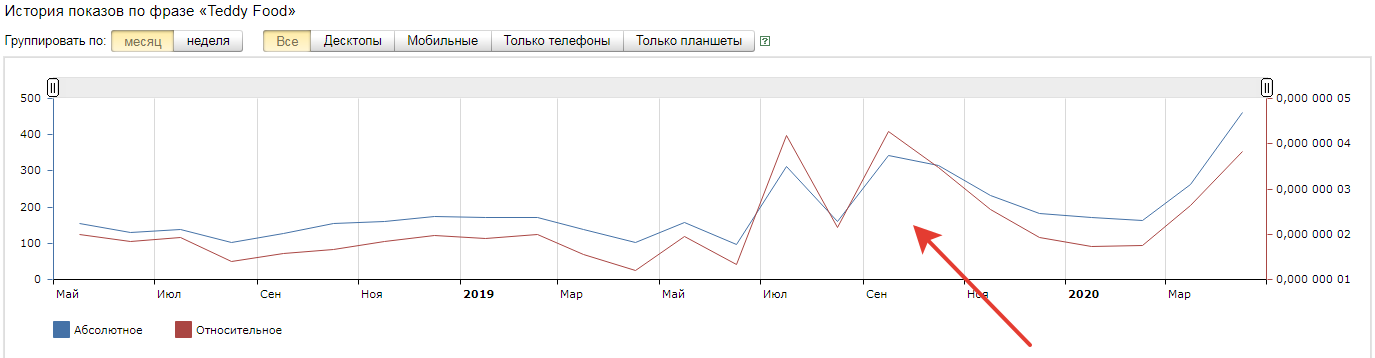

In [95]:
from IPython.display import Image
Image('2020-05-12_13-42-08.png')

### По данным сервиса https://wordstat.yandex.ru/, наибольшее число запросов пришлось непосредствено перед пиком по сумме транзакций

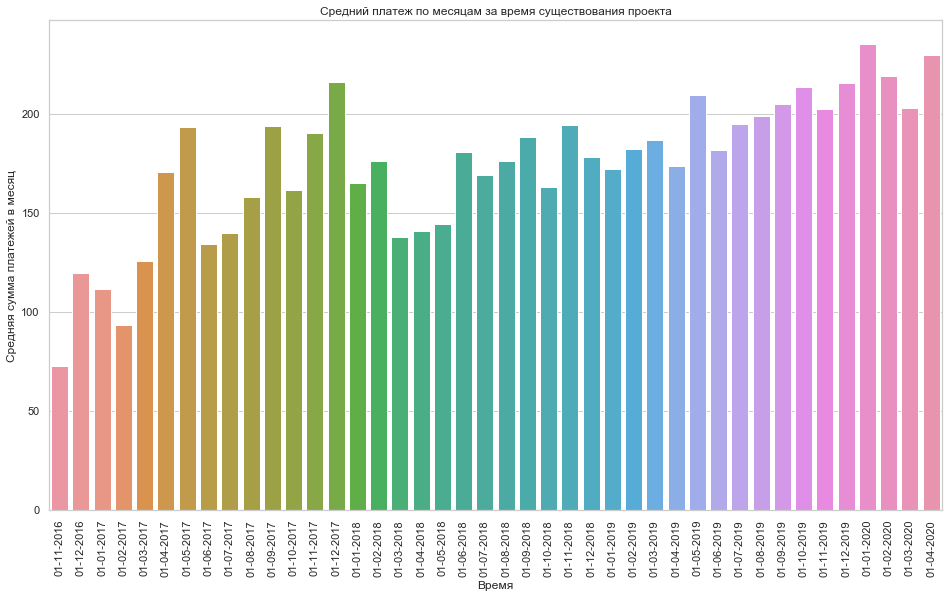

In [96]:
# построим график изменения среднего чека  по всем приютам в мес
df = transaction.groupby(['month']).agg({'amount':'mean'}).reset_index()
plt.figure(figsize=(16,9))
ax = sns.barplot(x='month', y='amount', data = df)
ax.set_ylabel('Средняя сумма платежей в месяц')
ax.set_xlabel('Время')
ax.set_xticklabels(df['month'].dt.strftime('%d-%m-%Y'))
ax.set_title('Средний платеж по месяцам за время существования проекта')
plt.xticks(rotation=90)

plt.show()

Как видим средний чек растет со временем жизни платформы

<a id="6"></a>
# Выводы и рекомендации:
### Выводы
 - В таблице нет пропусков, типы данных соотв значению  

 - Первая транзакция : 2016-11-08 Последняя: 2020-04-13 

 - Всего 1554 участника питомца, но есть животные котрых нет в описании, но они есть в транзакциях и  есть по которым нет транзакций, но они в описаниях. Это [Гуся](https://teddyfood.com/ru/animals/Gusia/) и [Лиса](https://teddyfood.com/ru/animals/Lisa_samara/)  
 - 74% всех питомцев нашли дом сейчас. но нужно понимть, что цифра усоовная, и многие только появились на сайте.  
 - Из 20 лидеров по платежам три питомца нашли дом  
 - Самое большое число участников проекта (животных) в Самаре , Перьми и МСК. Смоленск, Королев и Нефтекамск лидеры с хвоста  
 - Больше всего транзакции Самара, Казань, Пермь. Смоленск, Королев и Нефтекамск также лидеры с хвоста  
 - Долгожители всего по времени приюты: Матроскин, Надежда, Мокрый нос,  пару приютов по дню, недавно 4 лапы, Лаюши и Мяушки, Котланд Ярд  
 - Всего за день больше всего операций по Надежде, Люскин дом. Котланд-Ярд. Меньше в ЗОО дом, Ремпубликах и 4 лапах  
 - Ветераны платформы Матроскин, Самарский приют "НадеждА"  , новичики - Котланд-Ярд, Лаюшки и мяушки, 4 лапы. Московский "Муркоша", Республика Котов, Республика кошек и ЗОО Дом прекратили свое участие
 - Самое частое значение транзакции 100 р    
 - Максимум до 80 питомцев в одном заказе    
 - В среднем питомцев в заказе: 2.112262611083763    
 - Также видно большое количество выбросов по транзакциям, хотя медиана идет в районе 100-200 р    
 - Больше всего транзакции Самара, Казань, Пермь. Смоленск, Королев и Нефтекамск лидеры с хвоста   
 - В среднем за день больше всего операций по Надежде, Люскин дом. Котланд-Ярд, Меньше в ЗОО дом, Ремпубликах и 4 лапах  
 - А всего больше операций Надежда, Домик, мокрый нос  
 - Динамика суммарного чека по месяцам существовния платформы: хороший старт, потом всплески апр 2018, дек 2018 , июль 2019 и рекорд в окт 2019 и пошел спад пока  
 - Средний чек растет со временем жизни платформы  

**Проверка гипотез:**  
 - Можно сделать вывод, что средний чек кошек и собак отличается 
 - Также можно сделать вывод, что средний непищевой чек кошек и собак отличается    
 - Средний чек по полам котов отличается    
 - Полученное значение p-value говорит о том, что хотя средний чек по половому признаку собак слегка неодинаков, с вероятностью в почти 8% такое различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии чеков по полам собак.  

### Рекомендации
 - Прорекламировать тех, кто не был в транзакции
 - Описать тех,кого не было в описании
 - Всплески платежей совпадают с всплесками запросов в поисковике (Яндекс), возможно стоит чаще напоминать себе через СМИ
 - Активнее предлагать рекламирвоать приюты-новички


